# **Analytic Solution Pendulum with Extern Force and Drag**

When we talk about a pendulum with friction and/or friction force and also external force, we are not referring to the fact that the latter is another of the forces that oppose the movement, on the contrary, this external force **seeks to recover the lost energy which causes the friction force**. An example of this is when a child is riding a swing and uses his feet as a force to propel himself and not let himself be stopped by the wind; or someone is simply pushing him by applying a force until he has enough momentum for the wind to push him for an interval of time.

Let´s see a gif for a better understanding of what we´re saying here:

![ChessUrl](https://media.tenor.com/1LbZE_PVvtgAAAAC/swing.gif "swing")

The equation that governs this pendulum is the following:

$$\frac {d^2x}{dt^2} + \gamma \frac {dx}{dt} + \omega _{0}^2x = \frac {F_{0}}{m} cos(\omega t )$$

Remembering that $\gamma = \frac {b}{m}$

The solution of this differential equation is:

---

$$x = B e^{\frac {-\gamma t}{2}} cos (\omega _{1}t + \beta) + A cos(\omega t - \delta)$$

---

Where:

* $$\omega_{1} = [\omega_{0}^2 - \frac {\gamma^2}{4}]^{0.5}$$

* $$A(\omega) = \frac {F_{0}/m}{[(\omega _{0}^2 - \omega ^2)^2 + (\gamma \omega^2)^2]^ {0.5}}$$

* $$tan \delta(\omega) = \frac {\gamma \omega}{\omega _{0}^2 - \omega ^2}$$

Now we can make the code of analytical solution for the pendulum:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

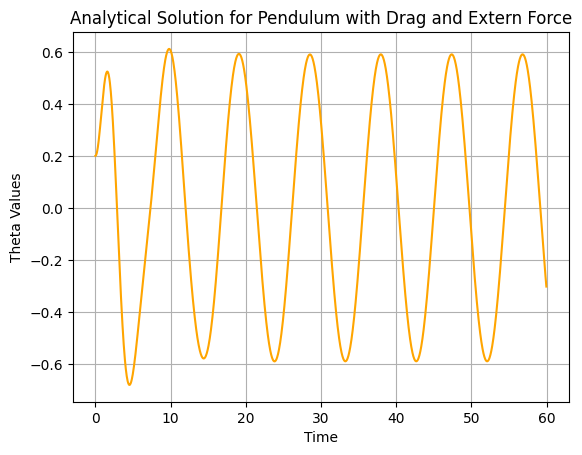

In [2]:
gravity = 9.8
force = 1.2
initial_theta = 0.2
mass = 1
omega = 2/3
gamma = 0.5
length = 4
x = []

omega0 = np.sqrt(gravity / length)
omega1 = np.sqrt(omega0 ** 2 - (gamma ** 2) / 4)
A = (force / mass) / np.sqrt((omega0 ** 2 - omega ** 2) ** 2 + (gamma * omega) ** 2)
delta = np.arctan(gamma * omega / (omega0 ** 2 - omega ** 2))
beta = np.arctan((1 / omega1) * ((A * omega * np.sin(delta))/
                                 (initial_theta - A * np.cos(delta)) - gamma/2))
B = (initial_theta - A * np.cos(delta)) / np.cos(beta)

time = np.arange(0, 60, 0.04)

for i in range(len(time)):
    x.append(B * np.exp(-gamma * time[i] / 2) * np.cos(omega1 * time[i] + beta)
             + A * np.cos(omega * time[i] - delta))

plt.plot(time, x, color = "orange")
plt.grid("---")
plt.xlabel('Time')
plt.ylabel('Theta Values')
plt.title('Analytical Solution for Pendulum with Drag and Extern Force')
plt.show()

# **Numerical Solution with Extern Force and Drag**

Using the formula for the second derivative of $\theta$ that we have been using throughout the Pendulum codes, but adding one more term, this is:

$$\frac {d^2\theta}{dt^2} = - \frac {g}{l} sin(\theta) - \gamma \frac {d\theta}{dt} + \frac {F_{ D}}{m} cos(Ω_{0} t)$$

This is the same differential equation as the analytical solution, it's just that it´s written in different terms:

* $\frac {g}{l} = \omega_{0}$

*  $sin(\theta) - \gamma \frac {d\theta}{dt} = \gamma \frac {dx}{dt}$

*  $\frac {F_{ D}}{m} cos(Ω_{0} t) = \frac {F_{0}}{m} cos (\omega t)$

*  $\omega = Ω_{0}$

Making a little sumary of what we have numerically for thsi pendulum:

> For small angles/Linear Pendulum:

   $$\omega_{0} = \sqrt{\frac {g}{l}}$$

   $$T_{0} = 2 \pi \sqrt{\frac {l}{g}}$$


> For large angles without friction:

   $$T(\theta _{0}) = 4 \sqrt {\frac {l}{g}} K sin(\frac {\theta _{0}}{2})$$

   $$\omega _{0}(\theta _{0}) = \frac {2 \pi}{T(\theta _{0})}$$

> For small angles with friction:

   $$F_{exte} = \frac {F_{D}}{ml}sin(Ω_{0}t)$$

   $$T_{D} = \frac {2 \pi}{Ω_{D}}$$

Now, let´s see the code!:

In [3]:
def extern_force_pendulum_numerical(fd_values, initial_theta, mass, omega, gamma, length):
    """
    :param fd_values: List of Extern Force Values
    :param initial_theta: Initial value for angle theta
    :param mass: Mass of the object
    :param omega: Initial value for extern force frequency
    :param gamma: Value of drag coefficient
    :param length: Length of the string
    :return:
    """
    gravity = 9.8
    time = np.arange(0, 60, 0.04)
    for FD in fd_values:
        omega = [omega]
        theta = [initial_theta]
        for i in range(len(time) - 1):
            omega.append(omega[i] - (gravity / length * np.sin(theta[i]) + gamma * omega[i] -
                                     (FD / mass) * np.cos(2 / 3 * time[i])) * time[1])
            theta.append(theta[i] + omega[i + 1] * time[1])
        plt.plot(time, theta, label= f"Numerical Solution with FD = {FD}")
    plt.legend(loc="best")
    plt.xlabel('Time')
    plt.ylabel('Theta')
    plt.title("Numerical Solution for Pendulum with Drag and Extern Force")
    plt.grid("---")
    plt.show()
    return

**Joining the two graphs for comparing them:**



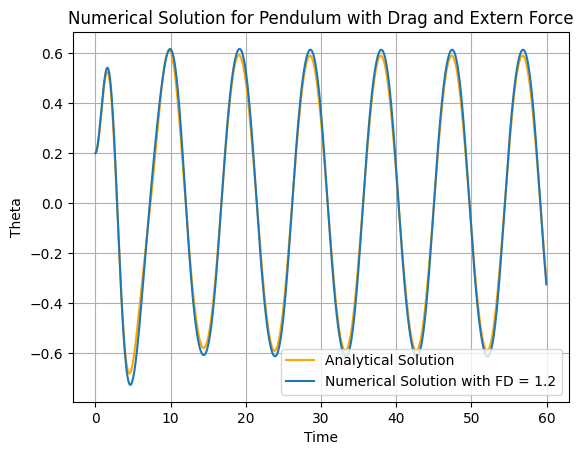

In [4]:
plt.plot(time, x, color = "orange", label = "Analytical Solution")
extern_force_pendulum_numerical([1.2], 0.2, 1, 0., 0.5, 4.)

As we can see in the graph, the numerical solution is almost the same as the analytical!!! This shows how effective and how well the code works. Also, we can see that the pendulum never stops: this makes complete sense because extern force is suposed to be the "recovery force of the motion", the extern force doesn´t allow the motion to be lost so the pendulum doesn´t stop even if it has drag force. 

---

We also compute the values of $\omega$ so let´s watch how it´s its behavior with different extern force values and the same $\gamma$ value in the numerical solution:


In [5]:
def externForceNumericalOmega(fd_values, theta, m, w, gamma, l):
    g = 9.8 
    time = np.arange(0, 60, 0.04)

    for FD in fd_values:
        w_values = [w]
        theta_values = [theta]

        for i in range(len(time) - 1):
            w_new = w_values[i] - (g / l * np.sin(theta_values[i]) + gamma * w_values[i] - (FD / m) * np.cos(2 / 3 * time[i])) * time[1]
            theta_new = theta_values[i] + w_new * time[1]

            w_values.append(w_new)
            theta_values.append(theta_new)

        plt.plot(time, theta_values, label=f"FD = {FD}")

    plt.legend(loc="best")
    plt.xlabel('Time')
    plt.ylabel('Omega Values')
    plt.title("Numerical Solution for Pendulum with Drag and External Force")
    plt.grid("---")
    plt.show()

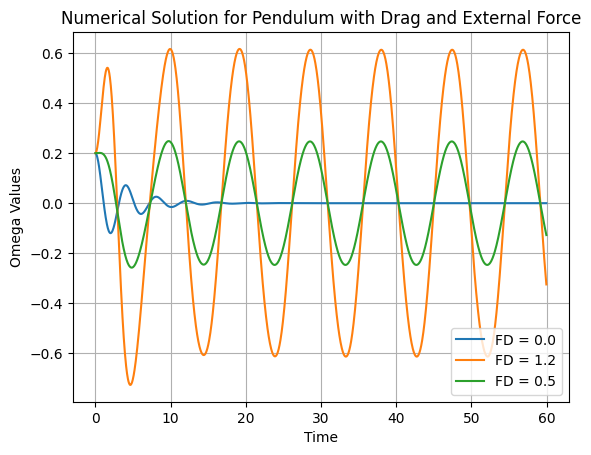

In [6]:
externForceNumericalOmega([0.0, 1.2, 0.5], 0.2, 1, 0, 0.5, 4)

Now, the easiest way of understanding this is watching a simulation. Let´s make it!!

## **3D graph**

Now, let´s make our glowscript simulation of this behavior!!:

In [7]:
%%html

<iframe src="simulaciones/PendulumExternForce.html" width="800" height="400"></iframe>

We add the link to a Google Colab where you can modify some parameters for your specific problem!! Just go **[here](https://colab.research.google.com/drive/1gIQK0ZZVxpwQ5GoIiqx7Tn1rk5s3Scue?usp=sharing)**

Hope you like it!